# Analyzing experiments from hyperparameter tuning runs
### Most experiments were to investigate different pretrained backbone architectures. The keras segmentation library [supports quite a few](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/backbones/backbones_factory.py)!

In [16]:
import seaborn as sns
import pandas as pd
from glob import glob
import os

In [57]:
# In the interest of time, I just dumped hyperparameters and the various metrics to a CSV file.
# Each model was trained for 10 epochs
# Note : due to an error, the parameterized loss function (default was dice coefficient) overwrote the training loss!
# Im re-running some of these to get that information. For now, validation loss is still available.

expResults = glob('logs/*.csv')
dfs = []
for i, er in enumerate(expResults):
    df = pd.read_csv(er)
    df['exp'] = i
    df['runID'] = os.path.split(er)[1].replace('experiment-','').replace('.csv','')
    dfs.append(df)
    
df = pd.concat(dfs)

df=df.set_index(['exp', 'epoch'])
df.groupby('exp').tail(1).sort_values('val_loss')             # final epoch of each run

f1-score  iou_score      loss      lr  val_f1-score  val_iou_score  \
exp epoch                                                                       
11  9      0.907327   0.837183      dice  0.0001      0.869921       0.783841   
7   9      0.905611   0.834358      dice  0.0001      0.865184       0.779533   
10  1      0.869743   0.784679  0.137313  0.0001      0.865433       0.779509   
3   8      0.903792   0.831575      dice  0.0001      0.862178       0.772711   
13  9      0.907666   0.837252      dice  0.0001      0.858661       0.768666   
8   1      0.872052   0.787390  0.134504  0.0001      0.845584       0.751894   
12  0      0.772933   0.664811  0.292387  0.0001      0.850896       0.756122   
4   9      0.909207   0.840058      dice  0.0001      0.839490       0.748528   
6   9      0.893149   0.814920      dice  0.0001      0.834320       0.739982   
14  9      0.880152   0.795026      dice  0.0001      0.815023       0.717376   
1   9      0.882369   0.798952      dice  0.0001      0.811765       0.712377   
9   9      0.887309   0.805312      dice  0.0001      0.807886       0.695951   
2   9      0.877765   0.791367      dice  0.0001      0.802662       0.698653   
0   9      0.850007   0.751489      dice  0.0001      0.797570       0.700157   
5   9      0.890715   0.810495  0.109713  0.0001      0.756159       0.644045   

           val_loss        backbone model  batchsize loss.1  gpu   nparams  \
exp epoch                                                                    
11  9      0.130311  efficientnetb0  Unet          4   dice    0  10115501   
7   9      0.135033  efficientnetb1  Unet          4   dice    1  12641169   
10  1      0.136286  efficientnetb6  Unet          2    NaN    4  50906009   
3   8      0.137978  efficientnetb2  Unet          4   dice    3  14295299   
13  9      0.141652  efficientnetb4  Unet          4   dice    4  25735017   
8   1      0.155814  efficientnetb5  Unet          2    NaN    1  37468673   
12  0      0.159191  efficientnetb7  Unet          2    NaN    5  75048097   
4   9      0.160694  efficientnetb3  Unet          4   dice    0  17867833   
6   9      0.166001     inceptionv3  Unet          4   dice    5  29933105   
14  9      0.185328        resnet18  Unet          4   dice    1  14340570   
1   9      0.188710     densenet121  Unet          4   dice    7  12144977   
9   9      0.192375     mobilenetv2  Unet          4   dice    4   8047441   
2   9      0.197442       resnext50  Unet          4   dice    6  32063194   
0   9      0.204128           vgg16  Unet          4   dice    2  23752273   
5   9      0.243964       mobilenet  Unet          4    NaN    2   8336337   

                                          runID         time lossfunc  
exp epoch                                                              
11  9      0f9fa94e-7a31-402e-a563-9f7e00392172          NaN      NaN  
7   9      6a9521de-5962-4e8a-a464-a2e224ddd895          NaN      NaN  
10  1      f8f53e82-82cf-4489-b0e9-31724d21dc00  3505.062429     dice  
3   8      50115da1-ae7a-442c-81d5-dfa27df63642          NaN      NaN  
13  9      bd399c2a-8985-4236-964a-c2cebf548852          NaN      NaN  
8   1      091dd8ea-491e-43ff-ae27-d8bda63dc813  2876.023178     dice  
12  0      2965ed2e-0ba0-4be5-b547-2b0bfaa4fa28  2249.088442     dice  
4   9      fb5f2f02-6bd1-402b-bd3e-8f1b0a718a40          NaN      NaN  
6   9      426f4de2-fb56-457d-89a5-b67ccb30456c          NaN      NaN  
14  9      49b655e1-6e61-4f07-b0b1-4e955e8c01e8          NaN      NaN  
1   9      c739557a-504a-4eb0-8bf4-8744a5f4118e          NaN      NaN  
9   9      97ea44fa-be9f-46f9-8bbe-a00c5104c29a          NaN      NaN  
2   9      d661072b-7ba2-4410-be53-dd4291f49a7b          NaN      NaN  
0   9      cd8ea9a5-0c2e-437b-83d8-ddf4e1fa53d1          NaN      NaN  
5   9      fce4f729-e448-4225-9084-c0ac784fb9ce  5376.113121     dice

In [12]:
df.reset_index()[['backbone', 'nparams']].drop_duplicates().sort_values('nparams')

backbone   nparams
72      mobilenetv2   8047441
46        mobilenet   8336337
82   efficientnetb0  10115501
10      densenet121  12144977
62   efficientnetb1  12641169
30   efficientnetb2  14295299
102        resnet18  14340570
36   efficientnetb3  17867833
0             vgg16  23752273
92   efficientnetb4  25735017
52      inceptionv3  29933105
20        resnext50  32063194

<AxesSubplot:xlabel='epoch', ylabel='val_loss'>

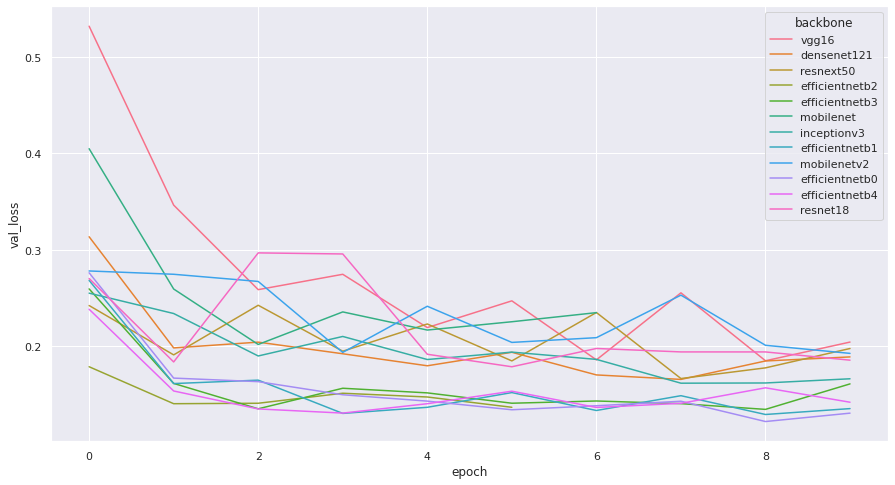

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df, hue='backbone', x='epoch', y='val_loss')

<AxesSubplot:xlabel='epoch', ylabel='iou_score'>

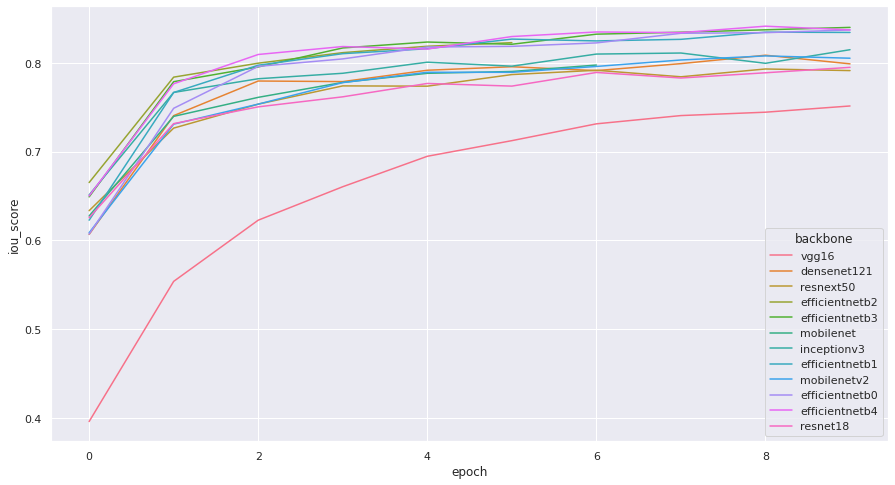

In [21]:
sns.lineplot(data=df.reset_index(), hue='backbone', x='epoch', y='iou_score')

### Looking for sweet spot models that have great performance with few parameters

<AxesSubplot:xlabel='nparams', ylabel='iou_score'>

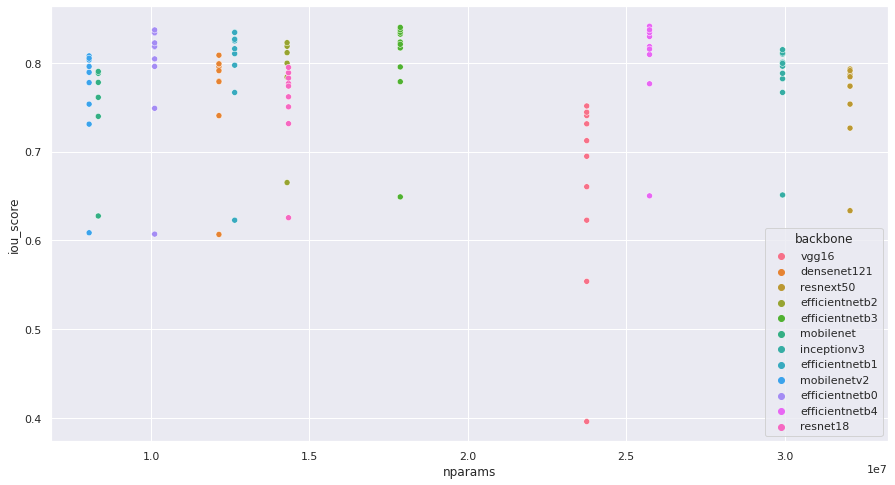

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=df, hue='backbone', x='nparams', y='iou_score')

# Plotting IoU score, which is the ["intersection over union"](https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) metric for the predicted segmentation masks
### This is just plotting each epoch score, which is weird, but it shows me which models converged quickly.

<AxesSubplot:xlabel='iou_score', ylabel='backbone'>

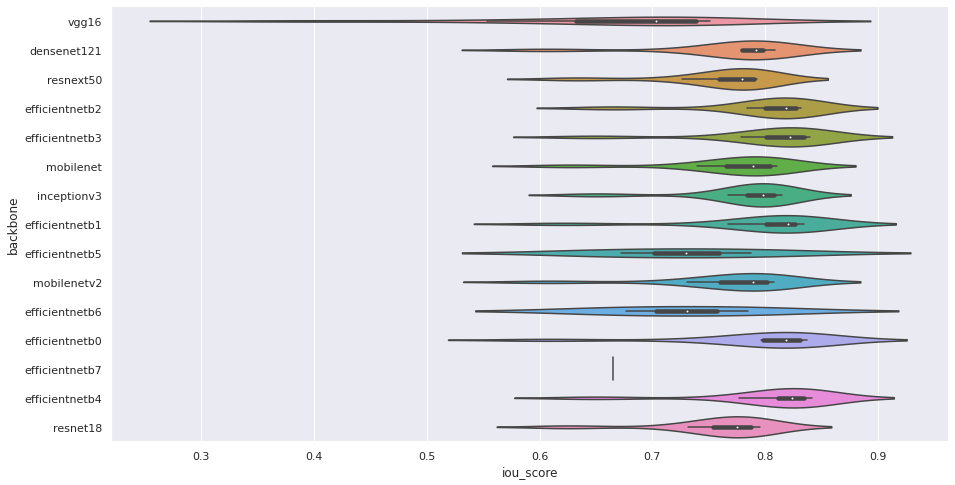

In [58]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=df, y='backbone', x='iou_score')

### Same idea, but only plotting the scores of the last 5 training epochs. Various efficientNet architectures are a clear winner.

<AxesSubplot:xlabel='iou_score', ylabel='backbone'>

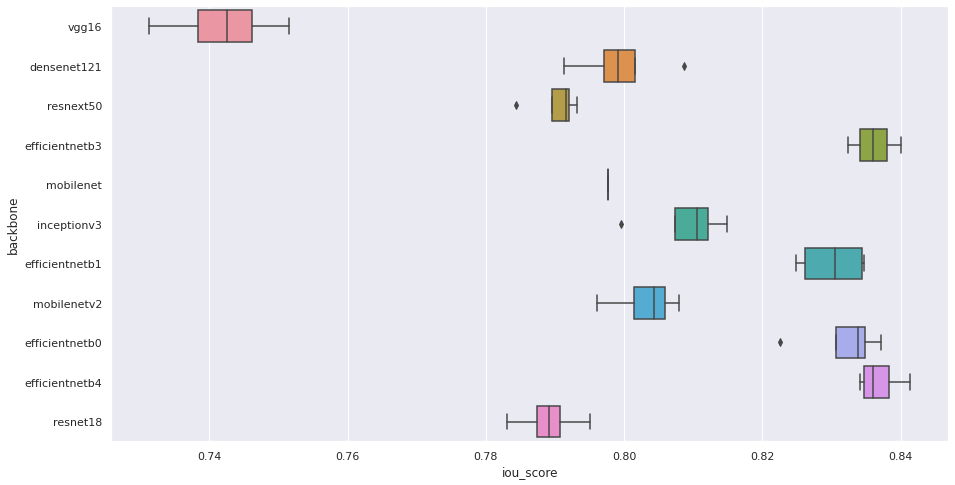

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
d = df.reset_index()
sns.boxplot(data=d[d.epoch>5], y='backbone', x='iou_score')

In [24]:
# lets pick a model and visualize the results on the validation set
df[df.backbone=='efficientnetb4']

f1-score  iou_score  loss      lr  val_f1-score  val_iou_score  \
exp epoch                                                                   
10  0      0.761736   0.650169  dice  0.0001      0.807907       0.705783   
    1      0.866129   0.776495  dice  0.0001      0.859058       0.772149   
    2      0.889721   0.809517  dice  0.0001      0.870057       0.788275   
    3      0.895991   0.818472  dice  0.0001      0.872936       0.792243   
    4      0.893201   0.815623  dice  0.0001      0.861797       0.774303   
    5      0.902925   0.829746  dice  0.0001      0.847705       0.753849   
    6      0.906592   0.834895  dice  0.0001      0.864308       0.779257   
    7      0.905705   0.834169  dice  0.0001      0.859820       0.768341   
    8      0.910762   0.841412  dice  0.0001      0.843672       0.748761   
    9      0.907666   0.837252  dice  0.0001      0.858661       0.768666   

           val_loss        backbone model  batchsize loss.1  gpu   nparams  \
exp epoch                                                                    
10  0      0.238206  efficientnetb4  Unet          4   dice    4  25735017   
    1      0.153333  efficientnetb4  Unet          4   dice    4  25735017   
    2      0.134681  efficientnetb4  Unet          4   dice    4  25735017   
    3      0.130372  efficientnetb4  Unet          4   dice    4  25735017   
    4      0.140113  efficientnetb4  Unet          4   dice    4  25735017   
    5      0.153110  efficientnetb4  Unet          4   dice    4  25735017   
    6      0.136229  efficientnetb4  Unet          4   dice    4  25735017   
    7      0.140528  efficientnetb4  Unet          4   dice    4  25735017   
    8      0.156632  efficientnetb4  Unet          4   dice    4  25735017   
    9      0.141652  efficientnetb4  Unet          4   dice    4  25735017   

                                          runID  time lossfunc  
exp epoch                                                       
10  0      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    1      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    2      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    3      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    4      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    5      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    6      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    7      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    8      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN  
    9      bd399c2a-8985-4236-964a-c2cebf548852   NaN      NaN

# loading saved weights for mobilenet to test

In [34]:
import segmentation_models as sm
from settings import validationImages, validationMasks
from generators import Dataset, Dataloder
from augmentation import get_validation_augmentation, get_preprocessing

BACKBONE = 'mobilenet'

preprocess_input = sm.get_preprocessing(BACKBONE)
model = sm.Unet(BACKBONE, activation='sigmoid')
model.load_weights('checkpoints/fce4f729-e448-4225-9084-c0ac784fb9ce_best_model.h5')

test_dataset = Dataset(
    validationImages,
    validationMasks,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)




/home/cosmo/miniconda3/envs/isic2018/lib/python3.10/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [55]:
os.environ['CUDA_VISIBLE_DEVICES'] = "11"
from train import getLoss
from tensorflow import keras

optim = keras.optimizers.Adam(0.0001)
total_loss = getLoss('dice')
model.compile(optim, total_loss)



In [48]:
# convenient viz functions borrowed from the keras segmentation models library

def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    

def denormalize(x):     # maps to the range 0-1
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x


# Visualization of results on validation dataset

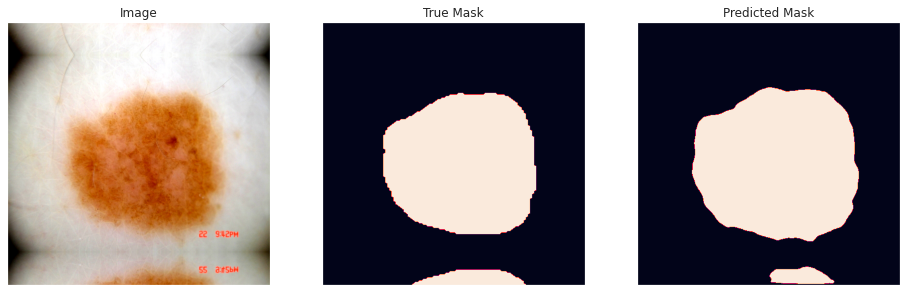

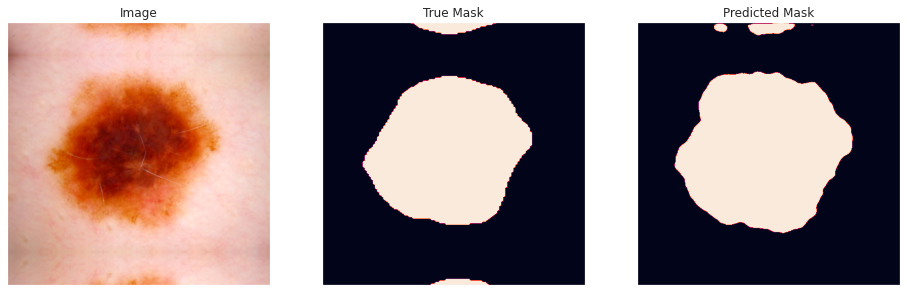

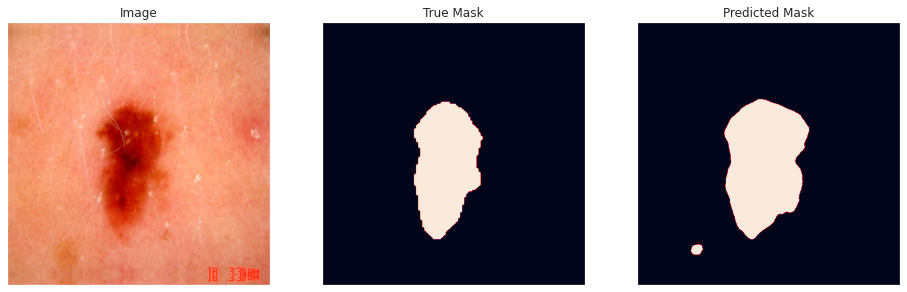

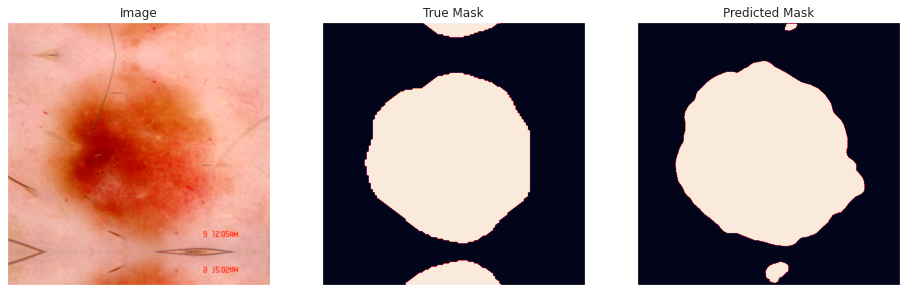

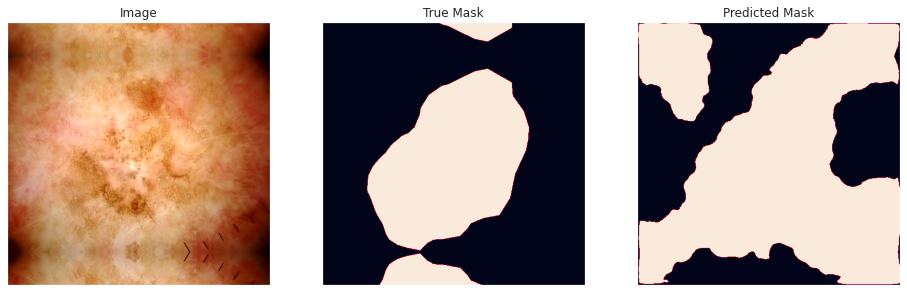

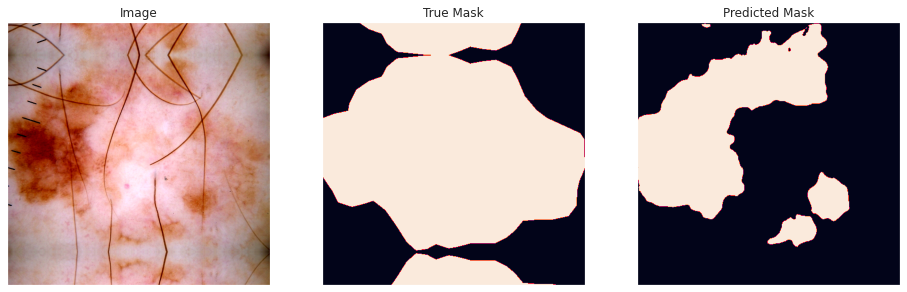

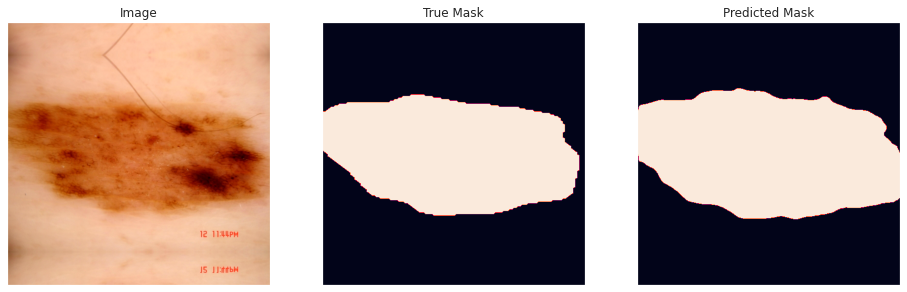

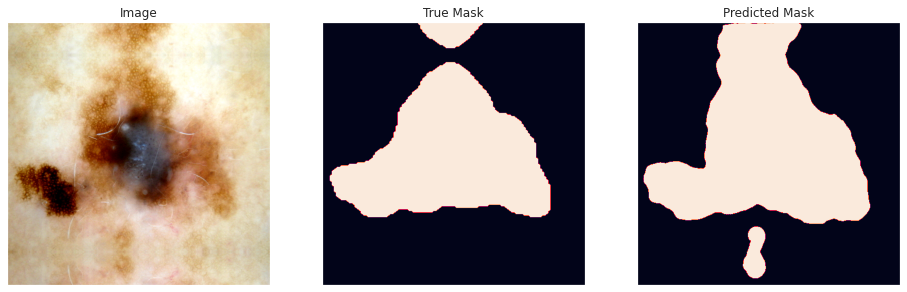

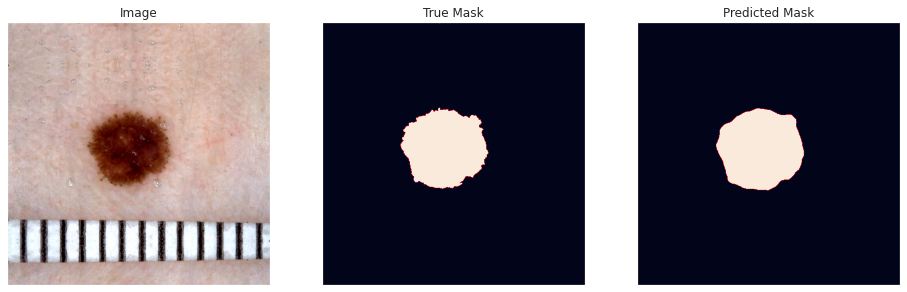

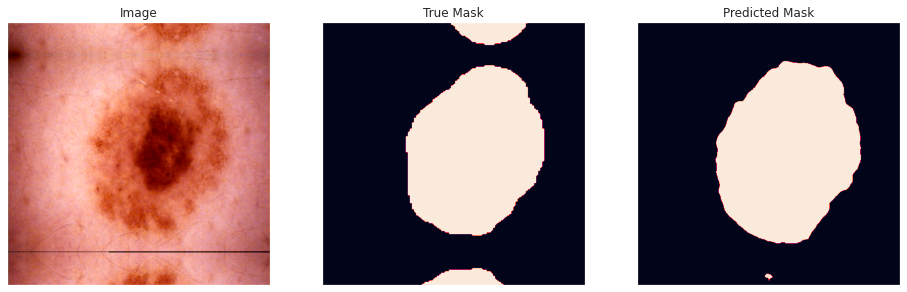

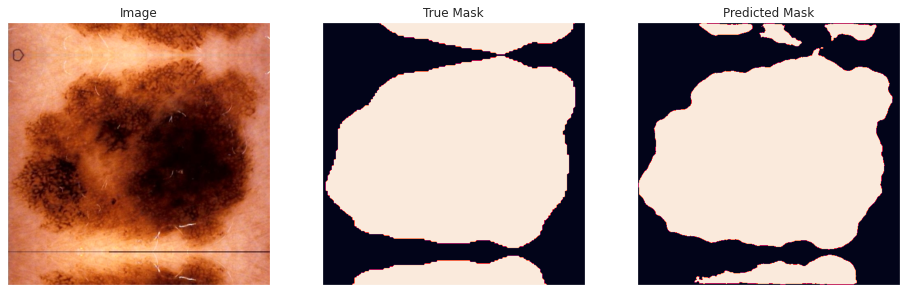

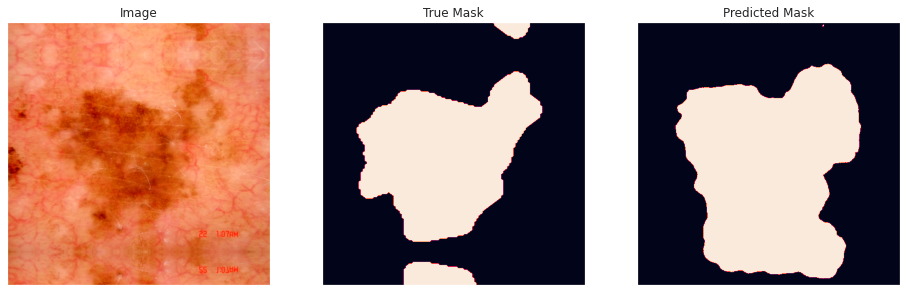

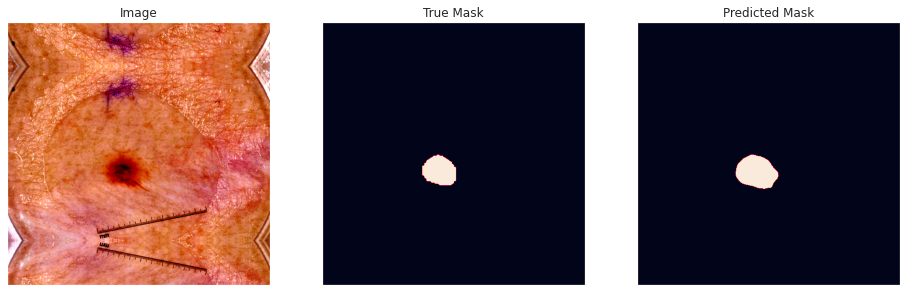

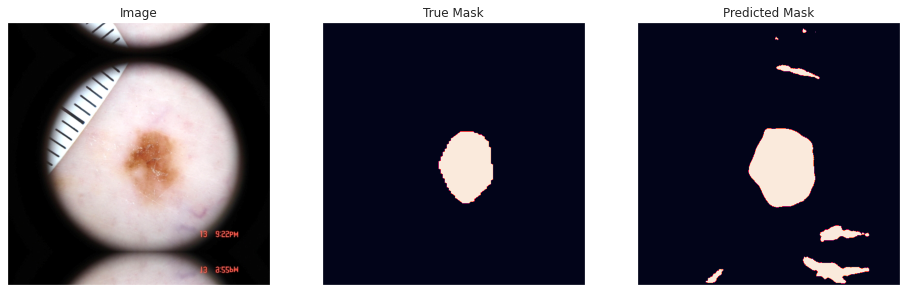

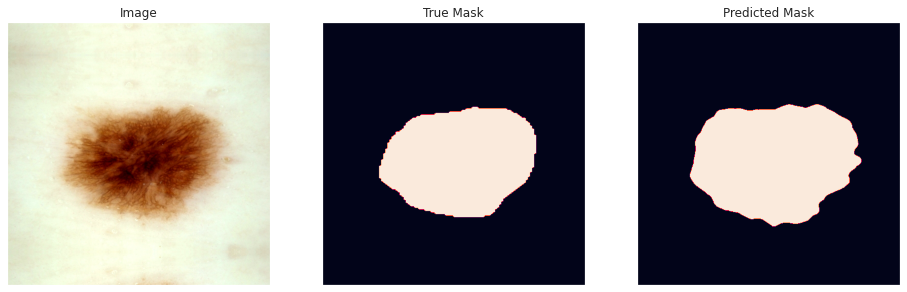

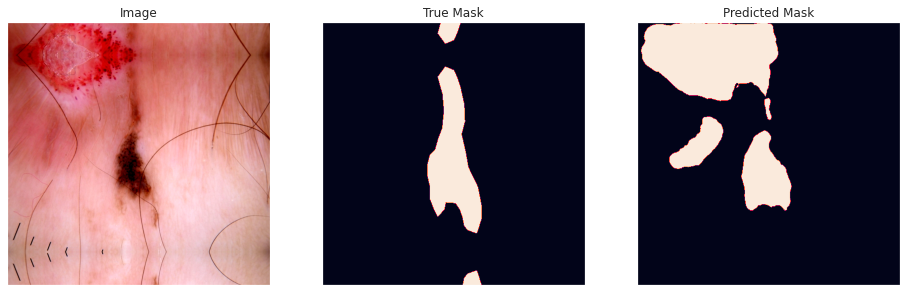

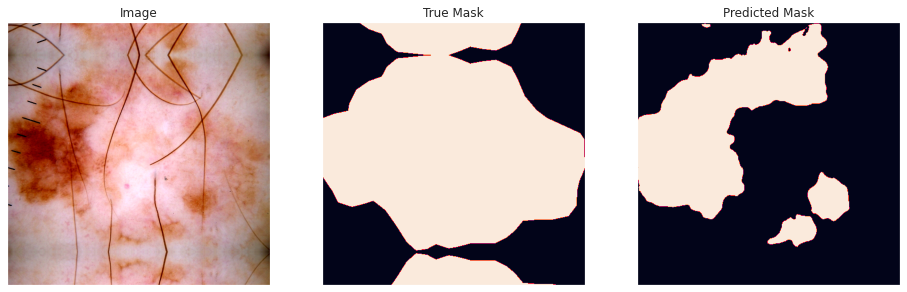

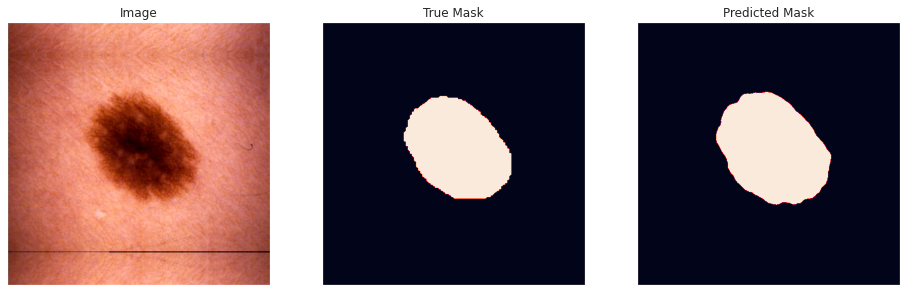

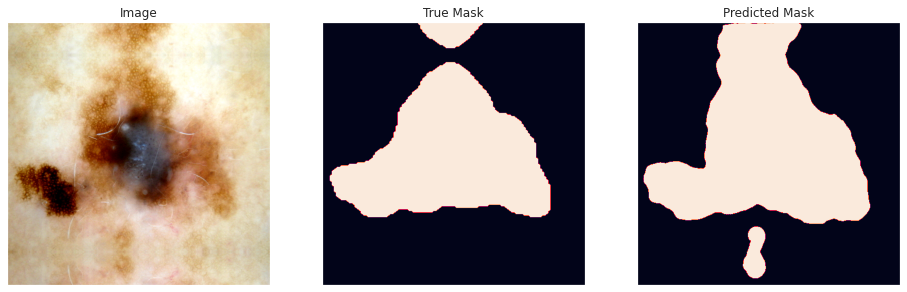

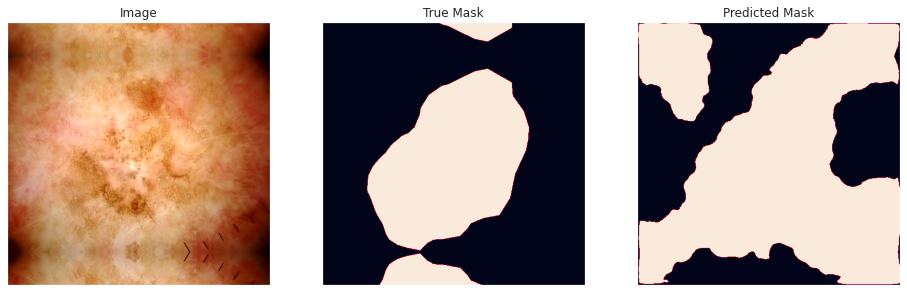

In [54]:
import numpy as np
import matplotlib.pyplot as plt

n = 20
ids = np.random.choice(np.arange(len(test_dataset)), size=n)

for i in ids:
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = model.predict(image, verbose=0).round()

    visualize(
        image=denormalize(image.squeeze()),
        true_mask=gt_mask[..., 0].squeeze(),
        predicted_mask=pr_mask[..., 0].squeeze(),
    )

# Visualization of results on test dataset